In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 1461s 9us/step


In [5]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
model = models.Sequential()

In [8]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

c:\MyFolder\Projects\University\ml-masters-sem3\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [10]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [11]:
model.add(layers.Flatten())

In [12]:
model.add(layers.Dense(64, activation='relu'))

In [13]:
model.add(layers.Dense(10))

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
history = model.fit(
    train_images, 
    train_labels, 
    epochs=10, 
    validation_data=(test_images, test_labels)
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3539 - loss: 1.7427 - val_accuracy: 0.5632 - val_loss: 1.2096
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5726 - loss: 1.2071 - val_accuracy: 0.6026 - val_loss: 1.1355
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6333 - loss: 1.0421 - val_accuracy: 0.6418 - val_loss: 1.0148
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6751 - loss: 0.9287 - val_accuracy: 0.6718 - val_loss: 0.9477
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7017 - loss: 0.8481 - val_accuracy: 0.6852 - val_loss: 0.9039
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7266 - loss: 0.7857 - val_accuracy: 0.6917 - val_loss: 0.8831
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7446 - loss: 0.7282 - val_accuracy: 0.7048 - val_loss: 0.8604
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7650 - loss: 0.6809 - 

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Точность на тестовых данных: {test_acc}")

313/313 - 0s - 1ms/step - accuracy: 0.7103 - loss: 0.8731
Точность на тестовых данных: 0.7103000283241272


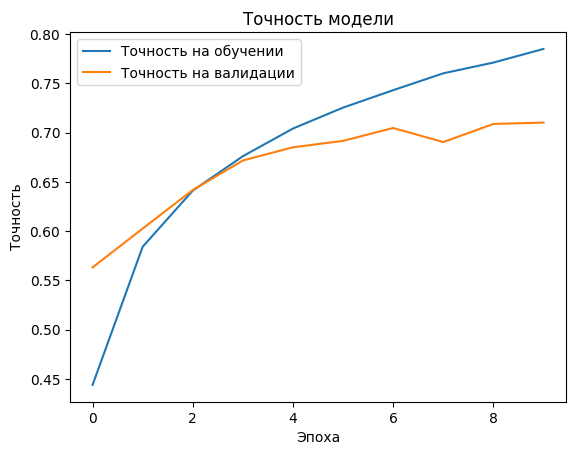

In [17]:
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на валидации')
plt.title('Точность модели')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()

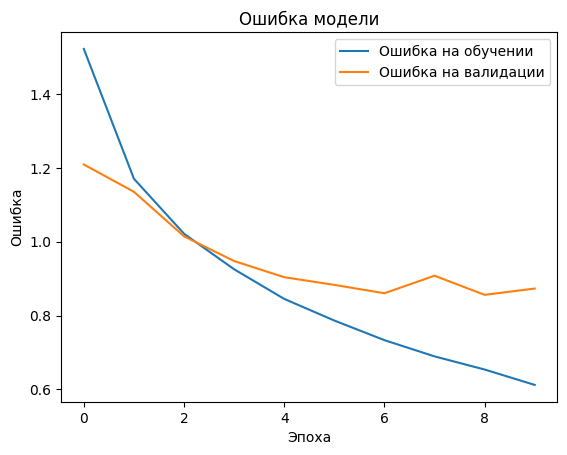

In [18]:
plt.plot(history.history['loss'], label='Ошибка на обучении')
plt.plot(history.history['val_loss'], label='Ошибка на валидации')
plt.title('Ошибка модели')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [19]:
import random

In [20]:
index = random.randint(0, len(test_images) - 1)
img = test_images[index]
true_label = test_labels[index]

In [21]:
img_expanded = np.expand_dims(img, axis=0)  # Добавляем размерность для batch_size
predictions = model.predict(img_expanded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [22]:
predicted_label = np.argmax(predictions)

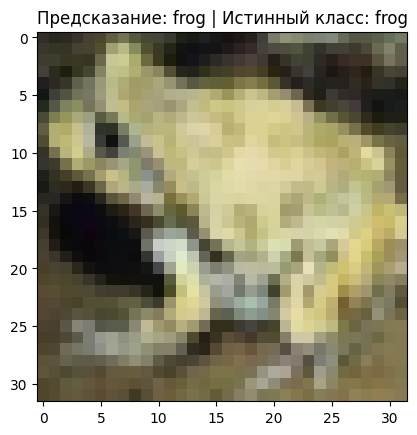

In [23]:
plt.imshow(img)
plt.title(f"Предсказание: {class_names[predicted_label]} | Истинный класс: {class_names[true_label[0]]}")
plt.show()